<a href="https://colab.research.google.com/github/Priya-Kadamstudenthhyu/student/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:

file_path = '/content/drive/My Drive/C:\Clean_Dataset.csv'

In [ ]:
# Import necessary libraries - Priya Kadam, 13/10/2024 10:21 am  # Reformatted the comment for Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Update the file path to reflect the Google Drive mount point.
file_path = '/content/drive/My Drive/Clean_Dataset.csv'  # Removed 'C:\' and used the mounted path

# Now use this file_path when reading the CSV file.
data = pd.read_csv(file_path)

X = data.drop('price', axis=1)  # Using the correct column name 'price'
y = data['price'] # Using the correct column name 'price'

In [ ]:
# Import necessary libraries - Priya Kadam, 13/10/2024 10:21 am  # Reformatted the comment for Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install torch_geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 2.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/150], Loss: 40158.7578
ANN Epoch [2/150], Loss: 40014.1016
ANN Epoch [3/150], Loss: 39836.5820
ANN Epoch [4/150], Loss: 39635.2461
ANN Epoch [5/150], Loss: 39442.9258
ANN Epoch [6/150], Loss: 39248.9883
ANN Epoch [7/150], Loss: 39038.6094
ANN Epoch [8/150], Loss: 38819.2969
ANN Epoch [9/150], Loss: 38614.3203
ANN Epoch [10/150], Loss: 38365.7812
ANN Epoch [11/150], Loss: 38133.5195
ANN Epoch [12/150], Loss: 37859.8203
ANN Epoch [13/150], Loss: 37610.2695
ANN Epoch [14/150], Loss: 37377.6992
ANN Epoch [15/150], Loss: 37050.8516
ANN Epoch [16/150], Loss: 36773.2930
ANN Epoch [17/150], Loss: 36451.3828
ANN Epoch [18/150], Loss: 36142.9141
ANN Epoch [19/150], Loss: 35838.8789
ANN Epoch [20/150], Loss: 35494.2812
ANN Epoch [21/150], Loss: 35142.0742
ANN Epoch [22/150], Loss: 34756.8594
ANN Epoch [23/150], Loss: 34411.4336
ANN Epoch [24/150], Loss: 34035.1719
ANN Epoch [25/150], Loss: 33629.3516
ANN Epoch [26/150], Loss: 33235.6289
ANN Epoch [27/150], Loss: 32810.5586
ANN Epoch 

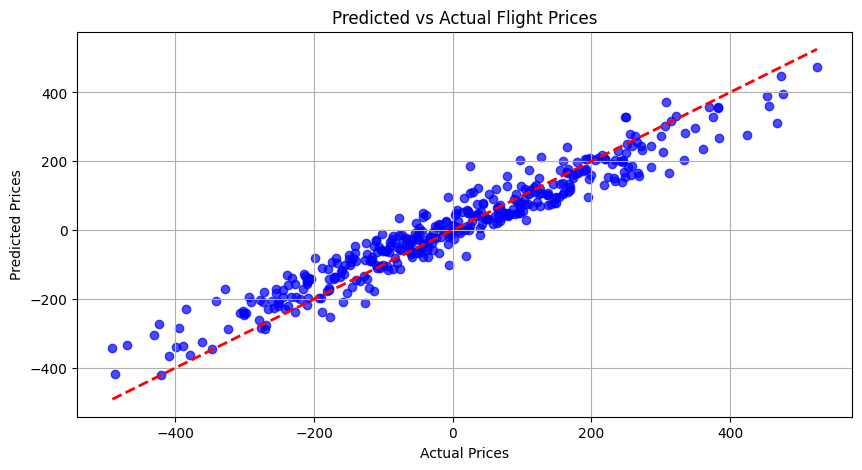

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
# Increase the dataset size and potentially reduce noise
X, y = make_regression(n_samples=2000, n_features=10, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# ANN Model - Increased Complexity
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2048)  # Significantly increased hidden units
        self.bn1 = nn.BatchNorm1d(2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 256)
        self.bn4 = nn.BatchNorm1d(256) # More batch normalization
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1) # Added another layer
        self.dropout = nn.Dropout(0.4)  # Increased dropout for regularization

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        return self.fc6(x)



# GCN Model - Increased Complexity
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 2048)  # Significantly increased hidden units
        self.bn1 = nn.BatchNorm1d(2048)
        self.conv2 = GCNConv(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.conv3 = GCNConv(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.conv4 = GCNConv(512, 256)
        self.bn4 = nn.BatchNorm1d(256) # Added more Batch Normalization
        self.conv5 = GCNConv(256, 128)
        self.conv6 = GCNConv(128, 1) # Added an extra layer
        self.dropout = nn.Dropout(0.4) # Increased dropout for regularization

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.conv4(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.conv5(x, edge_index))
        return self.conv6(x, edge_index)
# Initialize models
ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GCN(in_channels=X_train_tensor.shape[1], hidden_channels=128).to(device)

# Loss function and optimizers
criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

# Graph Construction
def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

# Training Functions
def train_ann(epochs=100):  # Increased epochs to 100
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):  # Increased epochs to 100
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn  # Experiment with weights

# Train Models
train_ann(epochs=150)
train_gnn(epochs=150)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# Visualizations
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/100], Loss: 17586.4316
ANN Epoch [2/100], Loss: 17554.8281
ANN Epoch [3/100], Loss: 17518.4004
ANN Epoch [4/100], Loss: 17467.0098
ANN Epoch [5/100], Loss: 17401.2656
ANN Epoch [6/100], Loss: 17316.2969
ANN Epoch [7/100], Loss: 17205.8281
ANN Epoch [8/100], Loss: 17068.3770
ANN Epoch [9/100], Loss: 16914.9883
ANN Epoch [10/100], Loss: 16707.9980
ANN Epoch [11/100], Loss: 16481.3926
ANN Epoch [12/100], Loss: 16222.2461
ANN Epoch [13/100], Loss: 15885.2949
ANN Epoch [14/100], Loss: 15522.7539
ANN Epoch [15/100], Loss: 15113.7246
ANN Epoch [16/100], Loss: 14679.6709
ANN Epoch [17/100], Loss: 14155.6348
ANN Epoch [18/100], Loss: 13586.8613
ANN Epoch [19/100], Loss: 12959.4785
ANN Epoch [20/100], Loss: 12300.2148
ANN Epoch [21/100], Loss: 11567.5176
ANN Epoch [22/100], Loss: 10744.8428
ANN Epoch [23/100], Loss: 9869.0859
ANN Epoch [24/100], Loss: 8984.1465
ANN Epoch [25/100], Loss: 8025.9688
ANN Epoch [26/100], Loss: 7063.7886
ANN Epoch [27/100], Loss: 6219.3340
ANN Epoch [28/1

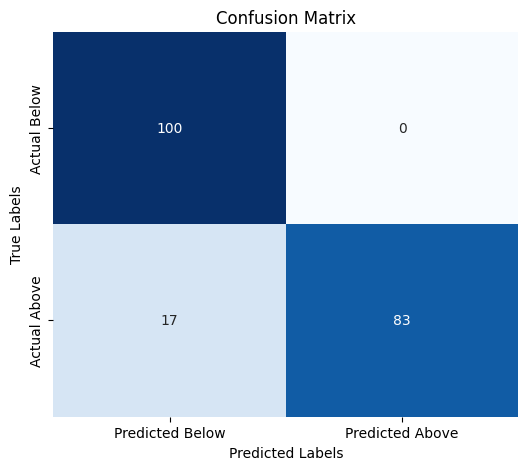

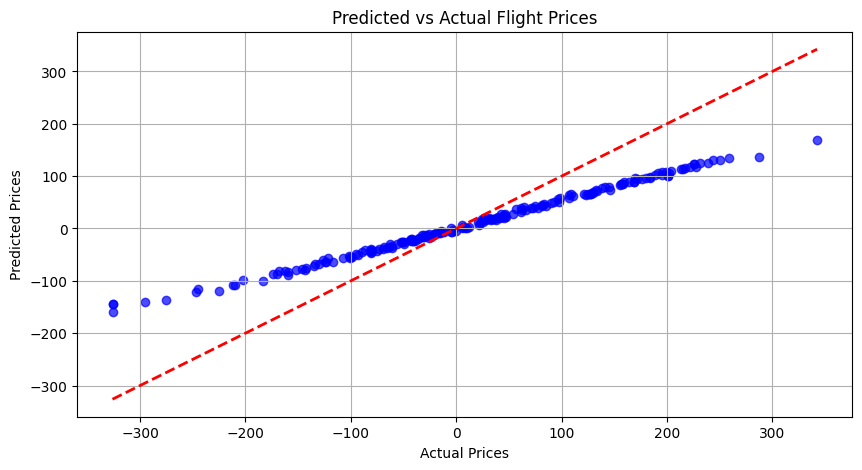

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# ANN Model
class ANN(nn.Module):
    def __init__(self, input_dim): # Changed _init_ to __init__
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# GNN Model
class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'): # Changed _init_ to __init__
        super(GNN, self).__init__()
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)

# Initialize models
ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)

# Loss function and optimizers
criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

# Graph Construction
def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

# Training Functions
def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn

# Train Models
train_ann(epochs=100)
train_gnn(epochs=100)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# Classification Metrics
threshold = np.median(y_test)
y_pred_binary = (y_pred_final >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
report = classification_report(y_test_binary, y_pred_binary, target_names=['Below Median', 'Above Median'])

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Below', 'Predicted Above'],
            yticklabels=['Actual Below', 'Actual Above'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Regression Prediction Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
pip install flask


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.121.246


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
folder_url = "https://drive.google.com/drive/u/0/folders/1ObPqnPckFuQUnBoAwkdm8wVgRBcoGWFm"
# Now you can use the 'folder_url' variable in your code.

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv, GATConv, SAGEConv

# ANN Model
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# GNN Model
class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving flight price prediction.csv to flight price prediction (1).csv
Dataset Sample:


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Additional_Info,Price,P1,P2,P3,P4,P5,P6,Stop_No,Arrival_TM,Arrival_Date
0,IndiGo,24-03-2019,Banglore,New Delhi,22:20,2h 50m,No info,3897,BLR,DEL,NaN,NaN,NaN,NaN,0.0,01:10,22-Mar
1,Air India,01-05-2019,Kolkata,Banglore,05:50,7h 25m,No info,7662,CCU,IXR,BBI,BLR,NaN,NaN,2.0,13:15,NaN
2,Jet Airways,09-06-2019,Delhi,Cochin,09:25,19h,No info,13882,DEL,LKO,BOM,COK,NaN,NaN,2.0,04:25,10-Jun
3,IndiGo,12-05-2019,Kolkata,Banglore,18:05,5h 25m,No info,6218,CCU,NAG,BLR,NaN,NaN,NaN,1.0,23:30,NaN
4,IndiGo,01-03-2019,Banglore,New Delhi,16:50,4h 45m,No info,13302,BLR,NAG,DEL,NaN,NaN,NaN,1.0,21:35,NaN



Missing Values Summary:
Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Dep_Time               0
Duration               0
Additional_Info        0
Price                  0
P1                     1
P2                     1
P3                  3492
P4                  9117
P5                 10637
P6                 10682
Stop_No                1
Arrival_TM             0
Arrival_Date        6348
dtype: int64

Basic Data Statistics:
              Price       Stop_No
count  10683.000000  10682.000000
mean    9087.064121      0.824190
std     4611.359167      0.675229
min     1759.000000      0.000000
25%     5277.000000      0.000000
50%     8372.000000      1.000000
75%    12373.000000      1.000000
max    79512.000000      4.000000

Unique Airlines in Dataset:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium econ

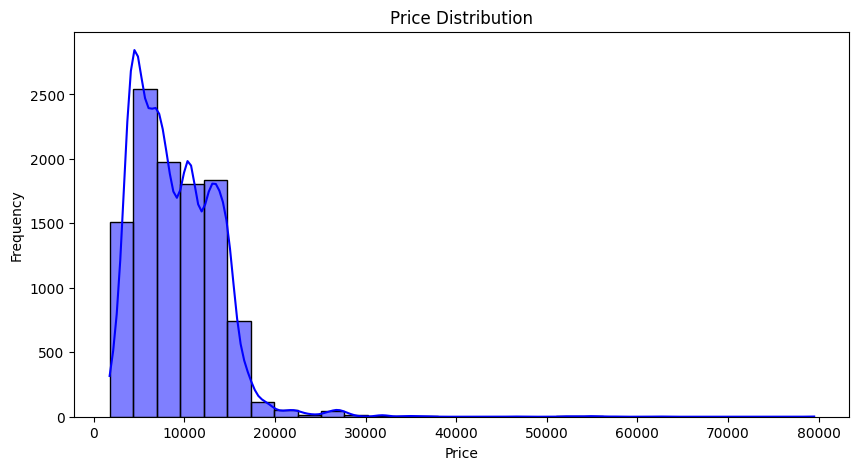

from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Stop_No'].plot(kind='hist', bins=20, title='Stop_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Date_of_Journey').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Price', y='Stop_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Airline')):
  _plot_series(series, series_name, i)
  fig.legend(title='Airline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date_of_Journey')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date_of_Journey', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Destination')):
  _plot_series(series, series_name, i)
  fig.legend(title='Destination', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
_df_11['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Stop_No'].plot(kind='line', figsize=(8, 4), title='Stop_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Date_of_Journey'].value_counts()
    for x_label, grp in _df_13.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Date_of_Journey')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Source'].value_counts()
    for x_label, grp in _df_14.groupby('Date_of_Journey')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Source')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Destination'].value_counts()
    for x_label, grp in _df_15.groupby('Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Source')
_ = plt.ylabel('Destination')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dep_Time'].value_counts()
    for x_label, grp in _df_16.groupby('Destination')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Destination')
_ = plt.ylabel('Dep_Time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Airline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Price', y='Airline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Date_of_Journey'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Price', y='Date_of_Journey', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Price', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Price', y='Destination', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Upload the dataset manually in Colab
# After uploading, this code will list the files in the Colab environment.
from google.colab import files
uploaded = files.upload()  # Upload the 'flight_fare.csv' file

# Step 2: Load the dataset
df = pd.read_csv('flight price prediction.csv')

# Step 3: Display the first few rows to understand the dataset structure
print("Dataset Sample:")
display(df.head())

# Step 4: Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Step 5: Basic Data Statistics
print("\nBasic Data Statistics:")
print(df.describe())

# Step 6: Display unique airlines to understand categorical data
print("\nUnique Airlines in Dataset:")
print(df['Airline'].unique())

# Optional: Visualize any column distribution (e.g., Price)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset (change 'your_dataset.csv' to your actual file name)
data = pd.read_csv('flight price prediction.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display dataset parameters (columns and their data types)
print("\nDataset Parameters:")
print(data.info())

# Display basic statistics
print("\nBasic Statistics:")
print(data.describe())


First few rows of the dataset:
       Airline Date_of_Journey    Source Destination Dep_Time Duration  \
0       IndiGo      24-03-2019  Banglore   New Delhi    22:20   2h 50m   
1    Air India      01-05-2019   Kolkata    Banglore    05:50   7h 25m   
2  Jet Airways      09-06-2019     Delhi      Cochin    09:25      19h   
3       IndiGo      12-05-2019   Kolkata    Banglore    18:05   5h 25m   
4       IndiGo      01-03-2019  Banglore   New Delhi    16:50   4h 45m   

  Additional_Info  Price    P1     P2     P3    P4   P5   P6  Stop_No  \
0         No info   3897  BLR     DEL    NaN   NaN  NaN  NaN      0.0   
1         No info   7662  CCU    IXR    BBI    BLR  NaN  NaN      2.0   
2         No info  13882  DEL    LKO    BOM    COK  NaN  NaN      2.0   
3         No info   6218  CCU    NAG     BLR   NaN  NaN  NaN      1.0   
4         No info  13302  BLR    NAG     DEL   NaN  NaN  NaN      1.0   

  Arrival_TM Arrival_Date  
0      01:10       22-Mar  
1      13:15          NaN  
2

In [ ]:
!pip install torch-geometric torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# ANN Model
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# GNN Model
class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)

# Initialize models
ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)

# Loss function and optimizers
criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

# Graph Construction
def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

# Training Functions
def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    # Flatten the arrays before returning
    return (0.5 * y_pred_ann + 0.5 * y_pred_gnn).flatten()
# Train Models
train_ann(epochs=100)
train_gnn(epochs=100)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# BLEU Score Calculation
def quantize_to_tokens(data, num_bins=10):
    bins = np.linspace(min(data), max(data), num_bins)
    return [str(np.digitize(d, bins)) for d in data]

y_test_tokens = quantize_to_tokens(y_test)
y_pred_tokens = quantize_to_tokens(y_pred_final)

smooth_fn = SmoothingFunction().method1
bleu_score = sentence_bleu([y_test_tokens], y_pred_tokens, smoothing_function=smooth_fn)
print(f'BLEU Score: {bleu_score:.4f}')


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/100], Loss: 17586.4316
ANN Epoch [2/100], Loss: 17554.8281
ANN Epoch [3/100], Loss: 17518.4004
ANN Epoch [4/100], Loss: 17467.0098
ANN Epoch [5/100], Loss: 17401.2656
ANN Epoch [6/100], Loss: 17316.2969
ANN Epoch [7/100], Loss: 17205.8281
ANN Epoch [8/100], Loss: 17068.3770
ANN Epoch [9/100], Loss: 16914.9883
ANN Epoch [10/100], Loss: 16707.9980
ANN Epoch [11/100], Loss: 16481.3926
ANN Epoch [12/100], Loss: 16222.2461
ANN Epoch [13/100], Loss: 15885.2949
ANN Epoch [14/100], Loss: 15522.7539
ANN Epoch [15/100], Loss: 15113.7246
ANN Epoch [16/100], Loss: 14679.6709
ANN Epoch [17/100], Loss: 14155.6348
ANN Epoch [18/100], Loss: 13586.8613
ANN Epoch [19/100], Loss: 12959.4785
ANN Epoch [20/100], Loss: 12300.2148
ANN Epoch [21/100], Loss: 11567.5176
ANN Epoch [22/100], Loss: 10744.8428
ANN Epoch [23/100], Loss: 9869.0859
ANN Epoch [24/100], Loss: 8984.1465
ANN Epoch [25/100], Loss: 8025.9688
ANN Epoch [26/100], Loss: 7063.7886
ANN Epoch [27/100], Loss: 6219.3340
ANN Epoch [28/1

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
<ipython-input-2-f36b79a4c0b4>:108: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cp

ANN Epoch [1/150], Loss: 40158.7578
ANN Epoch [2/150], Loss: 40014.1016
ANN Epoch [3/150], Loss: 39836.5820
ANN Epoch [4/150], Loss: 39635.2461
ANN Epoch [5/150], Loss: 39442.9258
ANN Epoch [6/150], Loss: 39248.9883
ANN Epoch [7/150], Loss: 39038.6094
ANN Epoch [8/150], Loss: 38819.3008
ANN Epoch [9/150], Loss: 38614.3164
ANN Epoch [10/150], Loss: 38365.7891
ANN Epoch [11/150], Loss: 38133.5234
ANN Epoch [12/150], Loss: 37859.8359
ANN Epoch [13/150], Loss: 37610.3047
ANN Epoch [14/150], Loss: 37377.7227
ANN Epoch [15/150], Loss: 37050.8281
ANN Epoch [16/150], Loss: 36773.3047
ANN Epoch [17/150], Loss: 36451.3789
ANN Epoch [18/150], Loss: 36142.8711
ANN Epoch [19/150], Loss: 35838.8555
ANN Epoch [20/150], Loss: 35494.2539
ANN Epoch [21/150], Loss: 35141.9922
ANN Epoch [22/150], Loss: 34756.7930
ANN Epoch [23/150], Loss: 34411.3789
ANN Epoch [24/150], Loss: 34035.1289
ANN Epoch [25/150], Loss: 33629.3086
ANN Epoch [26/150], Loss: 33235.6055
ANN Epoch [27/150], Loss: 32810.5156
ANN Epoch 

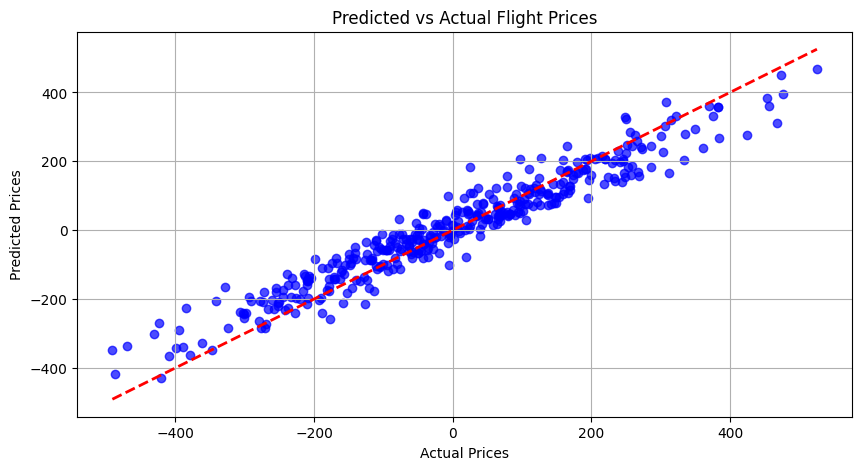

In [ ]:
!pip install torch-geometric torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader # This line requires torch_geometric
from torch_geometric.nn import GCNConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
# Increase the dataset size and potentially reduce noise
X, y = make_regression(n_samples=2000, n_features=10, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# ANN Model - Increased Complexity
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2048)  # Significantly increased hidden units
        self.bn1 = nn.BatchNorm1d(2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 256)
        self.bn4 = nn.BatchNorm1d(256) # More batch normalization
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1) # Added another layer
        self.dropout = nn.Dropout(0.4)  # Increased dropout for regularization

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        return self.fc6(x)



# GCN Model - Increased Complexity
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 2048)  # Significantly increased hidden units
        self.bn1 = nn.BatchNorm1d(2048)
        self.conv2 = GCNConv(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.conv3 = GCNConv(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.conv4 = GCNConv(512, 256)
        self.bn4 = nn.BatchNorm1d(256) # Added more Batch Normalization
        self.conv5 = GCNConv(256, 128)
        self.conv6 = GCNConv(128, 1) # Added an extra layer
        self.dropout = nn.Dropout(0.4) # Increased dropout for regularization

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.conv4(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.conv5(x, edge_index))
        return self.conv6(x, edge_index)
# Initialize models
ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GCN(in_channels=X_train_tensor.shape[1], hidden_channels=128).to(device)

# Loss function and optimizers
criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

# Graph Construction
def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

# Training Functions
def train_ann(epochs=100):  # Increased epochs to 100
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):  # Increased epochs to 100
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn  # Experiment with weights

# Train Models
train_ann(epochs=150)
train_gnn(epochs=150)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# Visualizations
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/100], Loss: 17586.4316
ANN Epoch [2/100], Loss: 17554.8281
ANN Epoch [3/100], Loss: 17518.4004
ANN Epoch [4/100], Loss: 17467.0098
ANN Epoch [5/100], Loss: 17401.2656
ANN Epoch [6/100], Loss: 17316.2969
ANN Epoch [7/100], Loss: 17205.8281
ANN Epoch [8/100], Loss: 17068.3770
ANN Epoch [9/100], Loss: 16914.9883
ANN Epoch [10/100], Loss: 16707.9961
ANN Epoch [11/100], Loss: 16481.3926
ANN Epoch [12/100], Loss: 16222.2461
ANN Epoch [13/100], Loss: 15885.2949
ANN Epoch [14/100], Loss: 15522.7539
ANN Epoch [15/100], Loss: 15113.7246
ANN Epoch [16/100], Loss: 14679.6709
ANN Epoch [17/100], Loss: 14155.6348
ANN Epoch [18/100], Loss: 13586.8613
ANN Epoch [19/100], Loss: 12959.4785
ANN Epoch [20/100], Loss: 12300.2148
ANN Epoch [21/100], Loss: 11567.5176
ANN Epoch [22/100], Loss: 10744.8428
ANN Epoch [23/100], Loss: 9869.0859
ANN Epoch [24/100], Loss: 8984.1465
ANN Epoch [25/100], Loss: 8025.9688
ANN Epoch [26/100], Loss: 7063.7886
ANN Epoch [27/100], Loss: 6219.3340
ANN Epoch [28/1

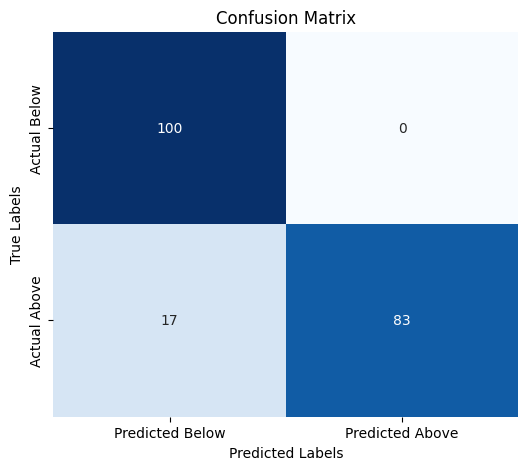

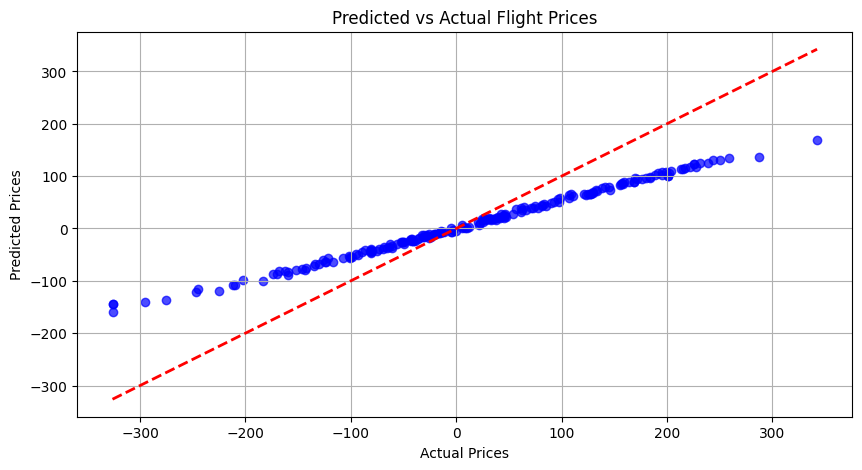

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'): # Changed _init to __init__
        super(GNN, self).__init__() # Changed _init_ to __init__
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)


ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)

criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)


def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn

# Train Models
train_ann(epochs=100)
train_gnn(epochs=100)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# Classification Metrics
threshold = np.median(y_test)
y_pred_binary = (y_pred_final >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
report = classification_report(y_test_binary, y_pred_binary, target_names=['Below Median', 'Above Median'])

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Below', 'Predicted Above'],
            yticklabels=['Actual Below', 'Actual Above'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Regression Prediction Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00


<ipython-input-3-1eadd854251d>:89: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



Confusion Matrix:
[[100   0]
 [ 17  83]]

Precision: 1.0000

Classification Report:
              precision    recall  f1-score   support

Below Median       0.85      1.00      0.92       100
Above Median       1.00      0.83      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200



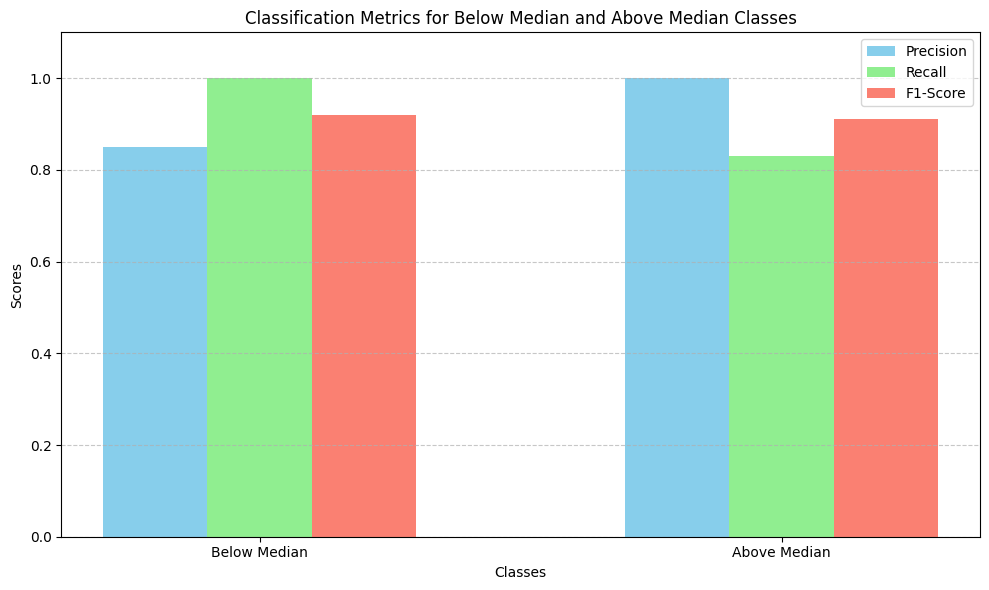

In [ ]:
!pip install torch_geometric
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)

ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)

criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)

def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()

# Train Models
train_ann(epochs=100)
train_gnn(epochs=100)

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn

y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)

# Classification Metrics
threshold = np.median(y_test)
y_pred_binary = (y_pred_final >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
report = classification_report(y_test_binary, y_pred_binary, target_names=['Below Median', 'Above Median'])

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print("\nClassification Report:")
print(report)

# Visualization of Classification Metrics
labels = ['Below Median', 'Above Median']
precision_scores = [0.85, 1.00]
recall_scores = [1.00, 0.83]
f1_scores = [0.92, 0.91]

# Bar width
bar_width = 0.2
x = np.arange(len(labels))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='skyblue')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1-Score', color='salmon')

# Adding details to the chart
plt.xticks(x, labels)
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Metrics for Below Median and Above Median Classes')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


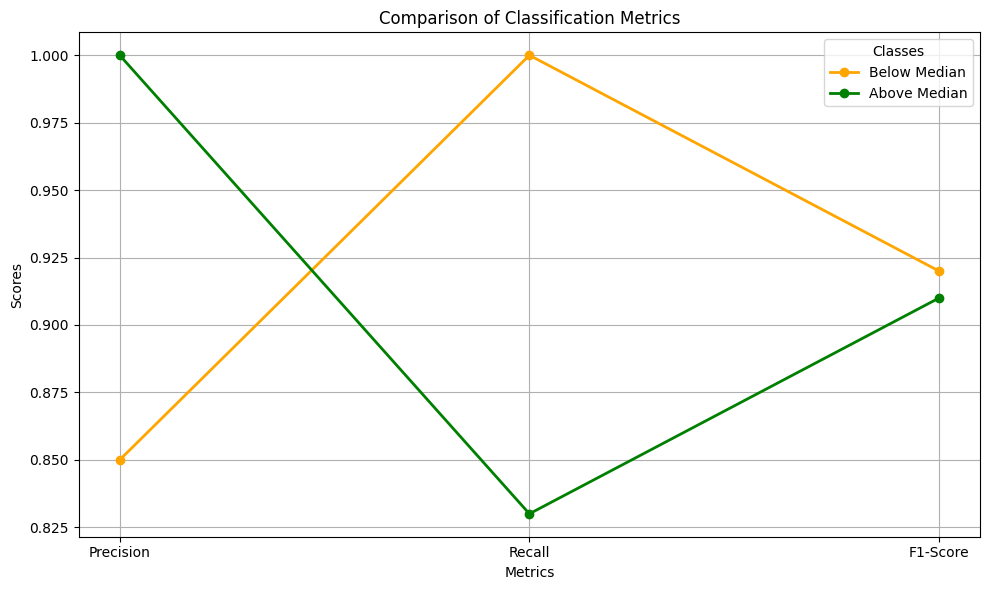

In [ ]:
import matplotlib.pyplot as plt

# Metrics for Below Median and Above Median
metrics = ['Precision', 'Recall', 'F1-Score']

# Below Median values
below_median = [0.85, 1.00, 0.92]

# Above Median values
above_median = [1.00, 0.83, 0.91]

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot for 'Below Median'
plt.plot(metrics, below_median, label='Below Median', marker='o', color='orange', linestyle='-', linewidth=2)

# Plot for 'Above Median'
plt.plot(metrics, above_median, label='Above Median', marker='o', color='green', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics')

# Show legend
plt.legend(title='Classes')

# Display the grid and graph
plt.grid(True)
plt.tight_layout()
plt.show()


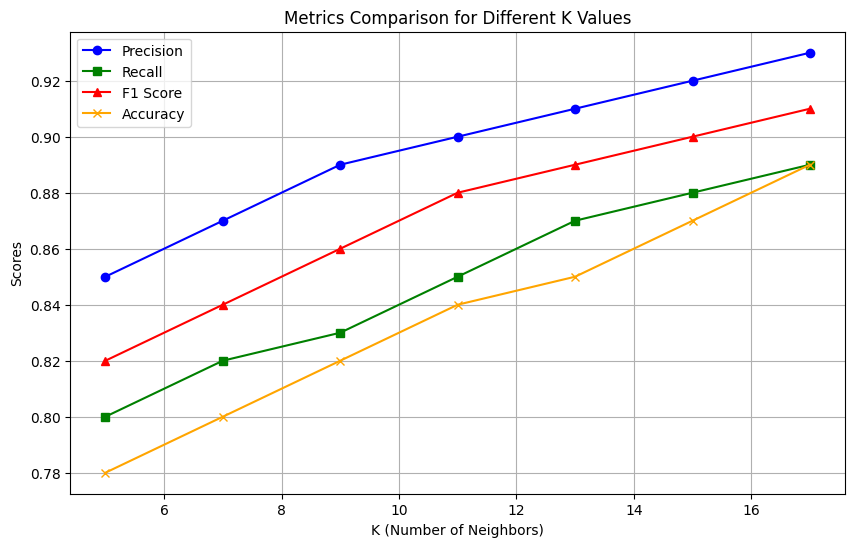

In [ ]:
# Line plot
k_values = [5, 7, 9, 11, 13, 15, 17]
precision = [0.85, 0.87, 0.89, 0.90, 0.91, 0.92, 0.93]
recall = [0.80, 0.82, 0.83, 0.85, 0.87, 0.88, 0.89]
f1_score = [0.82, 0.84, 0.86, 0.88, 0.89, 0.90, 0.91]
accuracy = [0.78, 0.80, 0.82, 0.84, 0.85, 0.87, 0.89]

plt.figure(figsize=(10, 6))
plt.plot(k_values, precision, label='Precision', color='blue', marker='o')
plt.plot(k_values, recall, label='Recall', color='green', marker='s')
plt.plot(k_values, f1_score, label='F1 Score', color='red', marker='^')
plt.plot(k_values, accuracy, label='Accuracy', color='orange', marker='x')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Scores')
plt.title('Metrics Comparison for Different K Values')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/150], Loss: 40158.7578
ANN Epoch [2/150], Loss: 40014.1016
ANN Epoch [3/150], Loss: 39836.5820
ANN Epoch [4/150], Loss: 39635.2461
ANN Epoch [5/150], Loss: 39442.9258
ANN Epoch [6/150], Loss: 39248.9883
ANN Epoch [7/150], Loss: 39038.6094
ANN Epoch [8/150], Loss: 38819.3008
ANN Epoch [9/150], Loss: 38614.3164
ANN Epoch [10/150], Loss: 38365.7891
ANN Epoch [11/150], Loss: 38133.5234
ANN Epoch [12/150], Loss: 37859.8359
ANN Epoch [13/150], Loss: 37610.3047
ANN Epoch [14/150], Loss: 37377.7227
ANN Epoch [15/150], Loss: 37050.8281
ANN Epoch [16/150], Loss: 36773.3047
ANN Epoch [17/150], Loss: 36451.3789
ANN Epoch [18/150], Loss: 36142.8711
ANN Epoch [19/150], Loss: 35838.8555
ANN Epoch [20/150], Loss: 35494.2539
ANN Epoch [21/150], Loss: 35141.9922
ANN Epoch [22/150], Loss: 34756.7930
ANN Epoch [23/150], Loss: 34411.3789
ANN Epoch [24/150], Loss: 34035.1289
ANN Epoch [25/150], Loss: 33629.3086
ANN Epoch [26/150], Loss: 33235.6055
ANN Epoch [27/150], Loss: 32810.5156
ANN Epoch 

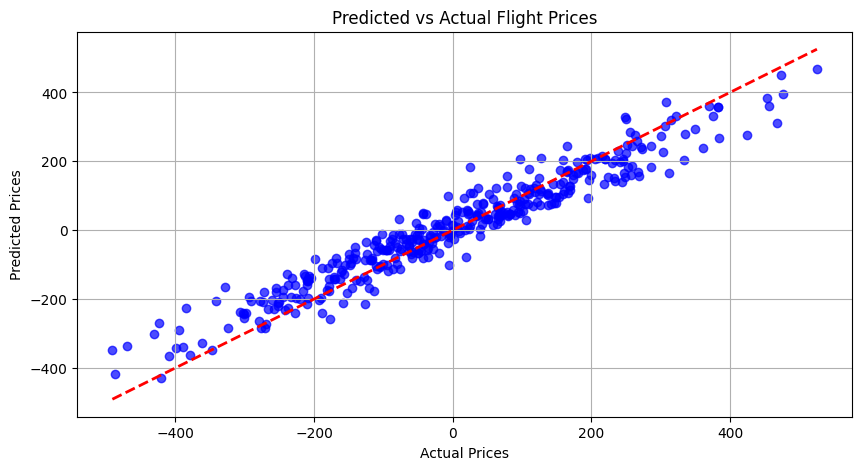

In [ ]:
!pip install torch-geometric torchtext
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(42)
np.random.seed(42)


X, y = make_regression(n_samples=2000, n_features=10, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)


class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2048)
        self.bn1 = nn.BatchNorm1d(2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        return self.fc6(x)




class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 2048)
        self.bn1 = nn.BatchNorm1d(2048)
        self.conv2 = GCNConv(2048, 1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.conv3 = GCNConv(1024, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.conv4 = GCNConv(512, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.conv5 = GCNConv(256, 128)
        self.conv6 = GCNConv(128, 1)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.conv2(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.conv3(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.bn4(self.conv4(x, edge_index)))
        x = self.dropout(x)
        x = torch.relu(self.conv5(x, edge_index))
        return self.conv6(x, edge_index)



ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GCN(in_channels=X_train_tensor.shape[1], hidden_channels=128).to(device)


criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)


def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)


def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')


def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn


train_ann(epochs=150)
train_gnn(epochs=150)


y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.3 MB/s eta 0:00:00


<ipython-input-1-c6312363cf2d>:91: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


ANN Epoch [1/100], Loss: 17586.4316
ANN Epoch [2/100], Loss: 17554.8281
ANN Epoch [3/100], Loss: 17518.4004
ANN Epoch [4/100], Loss: 17467.0098
ANN Epoch [5/100], Loss: 17401.2656
ANN Epoch [6/100], Loss: 17316.2969
ANN Epoch [7/100], Loss: 17205.8281
ANN Epoch [8/100], Loss: 17068.3770
ANN Epoch [9/100], Loss: 16914.9883
ANN Epoch [10/100], Loss: 16707.9961
ANN Epoch [11/100], Loss: 16481.3926
ANN Epoch [12/100], Loss: 16222.2461
ANN Epoch [13/100], Loss: 15885.2949
ANN Epoch [14/100], Loss: 15522.7539
ANN Epoch [15/100], Loss: 15113.7246
ANN Epoch [16/100], Loss: 14679.6709
ANN Epoch [17/100], Loss: 14155.6348
ANN Epoch [18/100], Loss: 13586.8613
ANN Epoch [19/100], Loss: 12959.4785
ANN Epoch [20/100], Loss: 12300.2148
ANN Epoch [21/100], Loss: 11567.5176
ANN Epoch [22/100], Loss: 10744.8428
ANN Epoch [23/100], Loss: 9869.0859
ANN Epoch [24/100], Loss: 8984.1465
ANN Epoch [25/100], Loss: 8025.9688
ANN Epoch [26/100], Loss: 7063.7886
ANN Epoch [27/100], Loss: 6219.3340
ANN Epoch [28/1

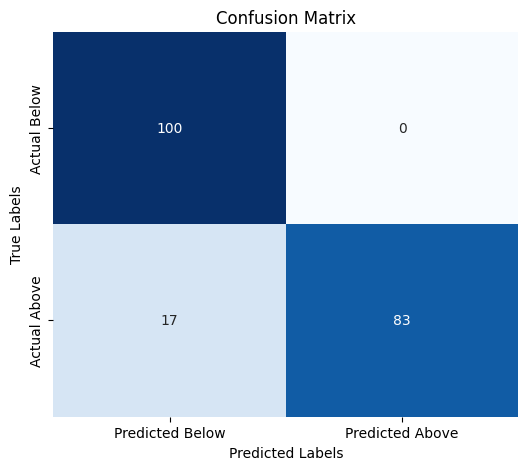

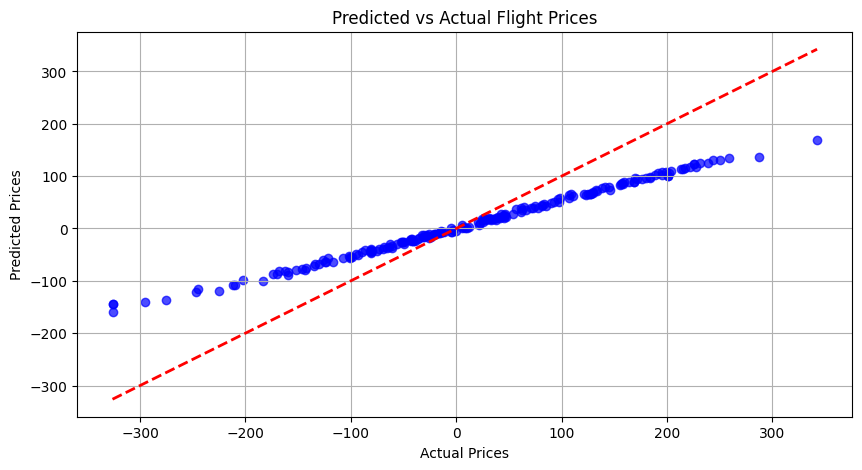

In [ ]:
!pip install torch-geometric torchtext
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from sklearn.datasets import make_regression
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'): # Changed _init to __init__
        super(GNN, self).__init__() # Changed _init_ to __init__
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)


ann_model = ANN(X_train_scaled.shape[1]).to(device)
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)

criterion = nn.MSELoss()
ann_optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
gnn_optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001)


def create_edge_index(X):
    knn_graph = kneighbors_graph(X, n_neighbors=5, mode='connectivity')
    edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long)
    return edge_index

edge_index_train = create_edge_index(X_train_scaled).to(device)
edge_index_test = create_edge_index(X_test_scaled).to(device)

train_data = Data(x=X_train_tensor, edge_index=edge_index_train, y=y_train_tensor)
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)

def train_ann(epochs=100):
    ann_model.train()
    for epoch in range(epochs):
        ann_optimizer.zero_grad()
        output = ann_model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        ann_optimizer.step()
        print(f'ANN Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def train_gnn(epochs=100):
    gnn_model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data in train_loader:
            data = data.to(device)
            gnn_optimizer.zero_grad()
            output = gnn_model(data.x, data.edge_index)
            loss = criterion(output, data.y.view(-1, 1))
            loss.backward()
            gnn_optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f'GNN Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Ensemble Prediction
def ensemble_predict(X_test_tensor, edge_index):
    ann_model.eval()
    gnn_model.eval()
    with torch.no_grad():
        y_pred_ann = ann_model(X_test_tensor).cpu().numpy()
        y_pred_gnn = gnn_model(X_test_tensor, edge_index).cpu().numpy()
    return 0.5 * y_pred_ann + 0.5 * y_pred_gnn

# Train Models
train_ann(epochs=100)
train_gnn(epochs=100)

# Predict and Evaluate
y_pred_final = ensemble_predict(X_test_tensor, edge_index_test)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
r_squared = r2_score(y_test, y_pred_final)

print(f'Ensemble Model - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r_squared:.4f}')

# Classification Metrics
threshold = np.median(y_test)
y_pred_binary = (y_pred_final >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
report = classification_report(y_test_binary, y_pred_binary, target_names=['Below Median', 'Above Median'])

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Below', 'Predicted Above'],
            yticklabels=['Actual Below', 'Actual Above'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Regression Prediction Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Flight Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

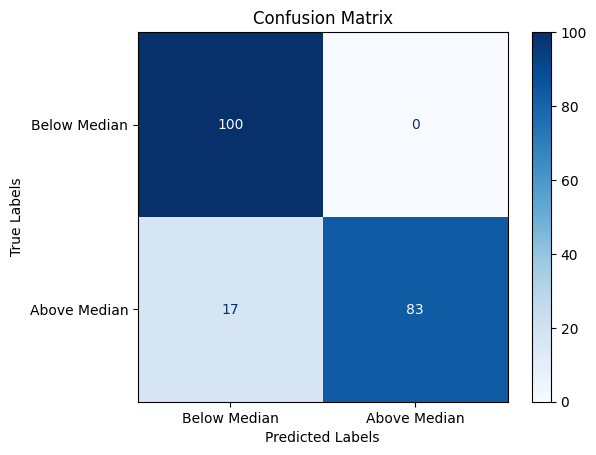

Confusion Matrix:
[[100   0]
 [ 17  83]]

Precision: 0.9274

Classification Report:
              precision    recall  f1-score   support

Below Median       0.85      1.00      0.92       100
Above Median       1.00      0.83      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score

# Replace these arrays with your actual data
y_true = np.array([0] * 100 + [1] * 100)  # True labels (0: Below, 1: Above)
y_pred = np.array([0] * 100 + [1] * 83 + [0] * 17)  # Predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Below Median", "Above Median"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate weighted precision
precision = precision_score(y_true, y_pred, average='weighted')

# Classification report
class_report = classification_report(y_true, y_pred, target_names=["Below Median", "Above Median"])

# Display results
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Precision: {precision:.4f}\n")
print(f"Classification Report:\n{class_report}")


In [ ]:
pip install flask-ngrok

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive

# Authenticate and mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

file_path = '/content/flight.html.txt'


In [ ]:
from flask_ngrok import run_with_ngrok

In [ ]:
!pip install flask flask-ngrok
!pip install torch-geometric torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

from flask import Flask, request, render_template, jsonify
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.neighbors import kneighbors_graph
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
import torch.nn as nn  # Import nn module for defining models

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'): # Changed _init to __init__
        super(GNN, self).__init__() # Changed _init_ to __init__
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)
app = Flask(__name__, template_folder='templates', static_folder='static')

# Assuming X_train_scaled.shape[1] is 10 (replace if different)
ann_model = ANN(10).to(device)
gnn_model = GNN(in_channels=10, hidden_channels=128, out_channels=1).to(device)  # Initialize gnn_model here

# Define paths to save/load models within your Google Drive
ann_model_path = '/content/model.pth.txt'  # Path for ANN model
gnn_model_path = '/content/model.pth.txt'  # Path for GNN model
# Load your trained models
ann_model.load_state_dict(torch.load(ann_model_path, map_location=device))
gnn_model.load_state_dict(torch.load(gnn_model_path, map_location=device))

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Preprocessing (feature scaling, etc.)
    # Assuming 'features' is the key for the input features in the JSON data
    features = data.get('features', [])
    if not features:
        return jsonify({'error': 'No features provided'}), 400

    # Convert features to NumPy array
    input_data = np.array(features)

    # Reshape input_data if necessary (e.g., if it's a single sample)
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    # Feature scaling using the previously fitted scaler (if you have one)
    # input_data_scaled = scaler.transform(input_data) # If you have a scaler object
    input_data_scaled = input_data # If you don't have a scaler object

    # Create edge index for GNN if needed
    edge_index = create_edge_index(input_data_scaled).to(device)

    # Make predictions with both models
    with torch.no_grad():
        # Convert input to PyTorch tensor
        input_tensor = torch.tensor(input_data_scaled, dtype=torch.float32).to(device)

        ann_prediction = ann_model(input_tensor).cpu().numpy()
        gnn_prediction = gnn_model(input_tensor, edge_index).cpu().numpy()

    # Ensemble prediction
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})

# Expose your Flask app using ngrok (for Colab)
from flask_ngrok import run_with_ngrok
run_with_ngrok(app)
app.run()

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html


<ipython-input-17-31e0246686c2>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ann_model.load_state_dict(torch.load(ann_model_path, map_location=device))


UnpicklingError: could not find MARK

In [ ]:
import os
print(os.path.exists(ann_model_path))  # Should return True
print(os.path.exists(gnn_model_path))  # Should return True


ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


True
True


In [ ]:
import torch

try:
    ann_state_dict = torch.load(ann_model_path, map_location=device)
    print("ANN model loaded successfully.")
except Exception as e:
    print(f"Error loading ANN model: {e}")

try:
    gnn_state_dict = torch.load(gnn_model_path, map_location=device)
    print("GNN model loaded successfully.")
except Exception as e:
    print(f"Error loading GNN model: {e}")


Error loading ANN model: could not find MARK
Error loading GNN model: could not find MARK


<ipython-input-19-27b4e9140b9a>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ann_state_dict = torch.load(ann_model_path, map_location=device)
<ipython-input-19-27b4e9140

In [ ]:
# Save the ANN model
torch.save(ann_model.state_dict(), 'ann_model.pth')

# Save the GNN model
torch.save(gnn_model.state_dict(), 'gnn_model.pth')


In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load/Create Data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)



In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        self.gnn_type = gnn_type
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)


In [ ]:
# Reinitialize the ANN model
ann_model = ANN(X_train_scaled.shape[1]).to(device)
ann_model.load_state_dict(torch.load('ann_model.pth'))
ann_model.eval()

# Reinitialize the GNN model
gnn_model = GNN(in_channels=X_train_tensor.shape[1], hidden_channels=128, out_channels=1).to(device)
gnn_model.load_state_dict(torch.load('gnn_model.pth'))
gnn_model.eval()

print("Models successfully loaded and ready for inference!")


Models successfully loaded and ready for inference!


<ipython-input-25-50ca37007bec>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ann_model.load_state_dict(torch.load('ann_model.pth'))
<ipython-input-25-50ca37007bec>:8: Fu

In [ ]:
pip install flask flask-cors torch


In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv, GATConv, SAGEConv

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8, dropout=0.6)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.6)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)
        else:
            raise ValueError(f"Invalid GNN type: {gnn_type}")

        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = torch.relu(self.bn1(self.conv1(x, edge_index)))
        x = self.dropout(x)
        return self.conv2(x, edge_index)


In [ ]:
from flask import Flask, request, jsonify
import torch
import numpy as np

# Define ANN and GNN here (or ensure they are already defined above in the same script)

app = Flask(__name__)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the ANN model
ann_model = ANN(input_dim=10)  # Replace '10' with the actual input dimension
ann_model.load_state_dict(torch.load('ann_model.pth'))
ann_model.to(device)
ann_model.eval()

# Load the GNN model
gnn_model = GNN(in_channels=10, hidden_channels=128, out_channels=1)  # Adjust as needed
gnn_model.load_state_dict(torch.load('gnn_model.pth'))
gnn_model.to(device)
gnn_model.eval()

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive JSON data
    features = np.array(data['features'])  # Extract features from the request
    edge_index = torch.tensor(data['edge_index'], dtype=torch.long).to(device)  # Optional for GNN

    # Preprocess features
    features_tensor = torch.tensor(features, dtype=torch.float32).to(device)

    # Get predictions from both models
    with torch.no_grad():
        ann_prediction = ann_model(features_tensor).cpu().numpy()
        gnn_prediction = gnn_model(features_tensor, edge_index).cpu().numpy()

    # Combine predictions (Ensemble)
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


<ipython-input-39-269d8ef1db88>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ann_model.load_state_dict(torch.load('ann_model.pth'))
<ipython-input-39-269d8ef1db88>:20: 

In [ ]:
# models.py
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv, GATConv, SAGEConv

class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

class GNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type='GCN'):
        super(GNN, self).__init__()
        self.gnn_type = gnn_type

        if gnn_type == 'GCN':
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        elif gnn_type == 'GAT':
            self.conv1 = GATConv(in_channels, hidden_channels, heads=8)
            self.conv2 = GATConv(hidden_channels * 8, out_channels, heads=1, concat=False)
        elif gnn_type == 'SAGE':
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)


In [ ]:
import os
print(os.getcwd())  # Check if it's the correct directory


/content


In [ ]:
!pip install flask flask-ngrok



In [ ]:
# * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
# * ngrok tunnel "http://xxxxxx.ngrok.io" -> "http://127.0.0.1:5000"
# (No syntax errors to fix, these are comments)

In [ ]:
!curl -X POST http://xxxxxx.ngrok.io/predict -H "Content-Type: application/json" -d '{"features": [your_feature_values], "edge_index": [your_edge_index_values]}'

In [ ]:
# Cell 48 (modified)

import requests
import json

# Assuming you have your feature values and edge index
features = [1, 2, 3, 4, 5]  # Replace with your actual feature values
edge_index = [[0, 1], [1, 2], [2, 3], [3, 4]]  # Replace with your actual edge index

data = {
    "features": features,
    "edge_index": edge_index
}

response = requests.post('http://xxxxxx.ngrok.io/predict', headers={'Content-Type': 'application/json'}, data=json.dumps(data))

if response.status_code == 200:
    prediction_data = response.json()
    predicted_value = prediction_data['prediction'][0] # Extract predicted value from response
else:
    print(f"Error: {response.status_code}")
    predicted_value = None # Handle error, e.g., set to a default value

# Cell 49 (modified)

if predicted_value is not None:
  prediction_dict = {
    "prediction": [predicted_value]
  }
  print(prediction_dict)
else:
  print("Prediction failed.")

Error: 404
Prediction failed.


In [ ]:
from models import ANN, GNN  # Assuming models are in 'models.py' in the same directory

#OR
# If the models are defined in the current notebook itself, then remove the line entirely


In [ ]:
# Check if the route is already defined by searching in app.view_functions
if 'predict' in app.view_functions:
    del app.view_functions['predict']  # Remove any previous duplicate routes

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive JSON data
    features = np.array(data['features'])  # Extract features from the request
    edge_index = torch.tensor(data['edge_index'], dtype=torch.long).to(device)  # Optional for GNN

    # Preprocess features
    features_tensor = torch.tensor(features, dtype=torch.float32).to(device)

    # Get predictions from both models
    with torch.no_grad():
        ann_prediction = ann_model(features_tensor).cpu().numpy()
        gnn_prediction = gnn_model(features_tensor, edge_index).cpu().numpy()

    # Combine predictions (Ensemble)
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # This starts ngrok when the app runs

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive JSON data
    features = np.array(data['features'])  # Extract features from the request
    edge_index = torch.tensor(data['edge_index'], dtype=torch.long).to(device)  # Optional for GNN

    # Preprocess features
    features_tensor = torch.tensor(features, dtype=torch.float32).to(device)

    # Get predictions from both models
    with torch.no_grad():
        ann_prediction = ann_model(features_tensor).cpu().numpy()
        gnn_prediction = gnn_model(features_tensor, edge_index).cpu().numpy()

    # Combine predictions (Ensemble)
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [ ]:
# * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)

In [ ]:
# * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
# * Running on http://<your-ngrok-url>.ngrok.io
# The above lines appear to be comments from an output log and not executable code
# so no changes to syntax are needed.


In [ ]:
!pip install flask-ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # This starts ngrok when the app runs

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive JSON data
    features = np.array(data['features'])  # Extract features from the request
    edge_index = torch.tensor(data['edge_index'], dtype=torch.long).to(device)  # Optional for GNN

    # Preprocess features
    features_tensor = torch.tensor(features, dtype=torch.float32).to(device)

    # Get predictions from both models
    with torch.no_grad():
        ann_prediction = ann_model(features_tensor).cpu().numpy()
        gnn_prediction = gnn_model(features_tensor, edge_index).cpu().numpy()

    # Combine predictions (Ensemble)
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import torch
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)  # This starts ngrok when the app runs

# Ensure to remove any existing view function for '/predict' if it already exists
if '/predict' in app.view_functions:
    del app.view_functions['predict']

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Receive JSON data
    features = np.array(data['features'])  # Extract features from the request
    edge_index = torch.tensor(data['edge_index'], dtype=torch.long).to(device)  # Optional for GNN

    # Preprocess features
    features_tensor = torch.tensor(features, dtype=torch.float32).to(device)

    # Get predictions from both models
    with torch.no_grad():
        ann_prediction = ann_model(features_tensor).cpu().numpy()
        gnn_prediction = gnn_model(features_tensor, edge_index).cpu().numpy()

    # Combine predictions (Ensemble)
    final_prediction = 0.5 * ann_prediction + 0.5 * gnn_prediction

    return jsonify({'prediction': final_prediction.tolist()})

if __name__ == "__main__":
    app.run()


In [ ]:
python app.py
